In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from imutils import paths
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
drive_path = '/content/drive/MyDrive/Merged Dataset/Merged Dataset'
files = os.listdir(drive_path)
print(files)

['Test', 'Train', 'Val']


# Importing Dataset

In [ ]:
ds = r"/content/drive/MyDrive/Merged Dataset/Merged Dataset"

In [ ]:
Test_path=os.path.sep.join([ds, "Test"])
Train_path=os.path.sep.join([ds, "Train"])
Val_path=os.path.sep.join([ds, "Val"])

In [ ]:
totalTest = len(list(paths.list_images(Test_path)))
totalTest

60

In [ ]:
totalTrain = len(list(paths.list_images(Train_path)))
totalTrain

2992

In [ ]:
totalVal = len(list(paths.list_images(Val_path)))
totalVal

748

# Data Augmentation

In [ ]:
ds_aug = ImageDataGenerator(horizontal_flip=True,
                            rescale=1 / 255.0,
                            rotation_range=20,
                            zoom_range=0.25,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            fill_mode="nearest")
ds_aug2 = ImageDataGenerator(rescale=1 / 255.0)

In [ ]:
training_data = ds_aug.flow_from_directory(Train_path,
                                            target_size=(64,64),
                                            batch_size=10,
                                            class_mode='binary',
                                            color_mode="rgb",
                                            shuffle=False)

val_data = ds_aug2.flow_from_directory(Val_path,
                                        target_size=(64,64),
                                        batch_size=10,
                                        class_mode='binary',
                                        color_mode="rgb",
                                        shuffle=False)

Found 2992 images belonging to 2 classes.
Found 748 images belonging to 2 classes.


In [ ]:
training_data.samples

2992

# Model Training

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Reshape, Activation

In [ ]:
# Building the model
model = Sequential()

# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = (64,64,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 29, 29, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                   

In [ ]:
model.compile(loss="binary_crossentropy",
           optimizer='adam',
           metrics=["accuracy"])

In [ ]:
history = model.fit(training_data,
                    batch_size=32,
                    epochs=70,
                    validation_data=val_data,
                    shuffle=True)

Epoch 1/70
300/300 [==============================] - 1052s 4s/step - loss: 0.6817 - accuracy: 0.5645 - val_loss: 0.6036 - val_accuracy: 0.6618
Epoch 2/70
300/300 [==============================] - 40s 131ms/step - loss: 0.6053 - accuracy: 0.6705 - val_loss: 0.7584 - val_accuracy: 0.5682
Epoch 3/70
300/300 [==============================] - 40s 132ms/step - loss: 0.5710 - accuracy: 0.7256 - val_loss: 0.5056 - val_accuracy: 0.7807
Epoch 4/70
300/300 [==============================] - 40s 133ms/step - loss: 0.5051 - accuracy: 0.7697 - val_loss: 0.4072 - val_accuracy: 0.8422
Epoch 5/70
300/300 [==============================] - 41s 135ms/step - loss: 0.4770 - accuracy: 0.7828 - val_loss: 0.4393 - val_accuracy: 0.8209
Epoch 6/70
300/300 [==============================] - 41s 136ms/step - loss: 0.4428 - accuracy: 0.8082 - val_loss: 0.3305 - val_accuracy: 0.8703
Epoch 7/70
300/300 [==============================] - 46s 152ms/step - loss: 0.4043 - accuracy: 0.8185 - val_loss: 0.3132 - val_acc

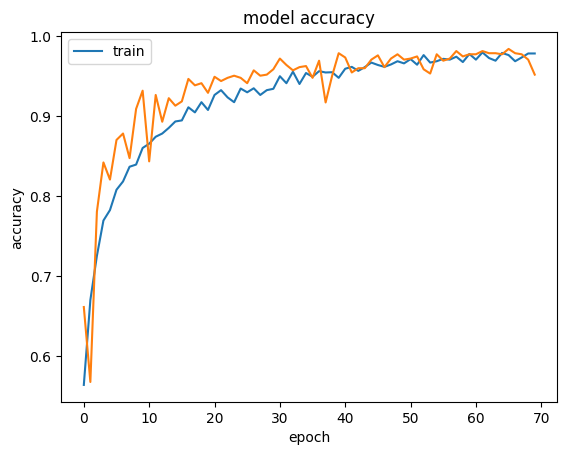

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train',], loc='upper left')
plt.show()

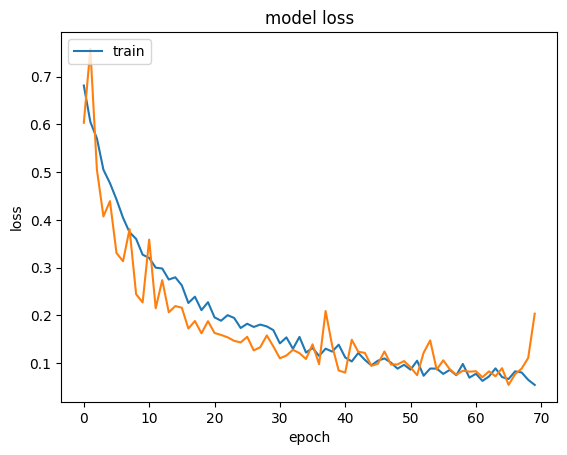

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
# model.save('CNN_3.h5')

In [ ]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img(r'/content/drive/MyDrive/Merged Dataset/Merged Dataset/Test/normal.jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
print(result)
if result[0][0] >= 0.5:
    p = 'normal'
else:
    p = 'cataract'
print(p)

1/1 [==============================] - 0s 25ms/step
[[1.]]
normal
